<center>

#*Trabajo Practico 1*
### Series de Tiempo en Finanzas 2023
##*- Grupo 3 -*
#### *Joaquín Aguirre, María Laura Caullo, Aldana Ruscitti, Ignacio Fichetti y Manuel Juárez*

 ### Problema 1:

- Objetivo de este problema: Estudiar la demanda mensual de energia electrica en Victoria. Realice gráficos siguiendo la notebook **Visualizacion de datos de polucion de corea.ipynb** realice

- Gráfico de radar

- Gráfico de barra circular

- Gráfico de ploteo radial

 Genere un única imagen uniendo los gráficos anuales para cada caso.

### Problema 2:

- Objetivo de este problema: Realizar descomposiciones en tendencia y estacionalidad aditiva y multiplicativa para los gases de madrid 'NO_2' y 'CO'.  Dar una opinion de lo observado.

### Problema 3:

- Objetivo de este problema: Realizar suavizado exponencial, suavizado de Holt y suavizado de Holt-Winter  para los gases de madrid 'NO_2' y 'CO'.

- Encontrar los parámetros generando un set de validación y MSE.

- Predecir usando TODA la serie (train mas validacion) y comparar con TEST .

- Plotear la serie completa y la prediccion para observar el comportamiento de cada uno de los suavizados.

- Dar una opinion de la bondad del método para estas series.


# **Resoluciones**

Carga de paquetes y de base de datos

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

url = 'https://raw.githubusercontent.com/jaguirre-econ/Proyectos-Ciencia-de-Datos/main/vic_elec.csv'
df = pd.read_csv(url)
df.head()

,Time,Demand,Temperature,Date,Holiday
0,2011-12-31T13:00:00Z,4382.825174,21.40,2012-01-01,True
1,2011-12-31T13:30:00Z,4263.365526,21.05,2012-01-01,True
2,2011-12-31T14:00:00Z,4048.966046,20.70,2012-01-01,True
3,2011-12-31T14:30:00Z,3877.563330,20.55,2012-01-01,True
4,2011-12-31T15:00:00Z,4036.229746,20.40,2012-01-01,True


Formato datetime

In [ ]:
df['Time'] = pd.to_datetime(df['Time'], format='%Y-%m-%dT%H:%M:%SZ')
df = df.set_index('Time')
df = df.asfreq('30min')
df = df.sort_index()
df.head()

,Demand,Temperature,Date,Holiday
Time,,,,
2011-12-31 13:00:00,4382.825174,21.40,2012-01-01,True
2011-12-31 13:30:00,4263.365526,21.05,2012-01-01,True
2011-12-31 14:00:00,4048.966046,20.70,2012-01-01,True
2011-12-31 14:30:00,3877.563330,20.55,2012-01-01,True
2011-12-31 15:00:00,4036.229746,20.40,2012-01-01,True


## *Problema 1*

Primero obtenemos un promedio mensual de la demanda de energía eléctrica, para luego poder graficar.

In [ ]:
df_1 = df.drop(columns='Date')
df_1 = df_1.resample(rule='m', closed='left', label ='right').mean()
df_1['Month'] = df_1.index.strftime('%b')
df_1['Year'] = df_1.index.year
df_1['Month-Year'] = df_1.index.strftime('%b-%y')
df_1.head()

,Demand,Temperature,Holiday,Month,Year,Month-Year
Time,,,,,,
2012-01-31,4863.024385,21.906635,0.098495,Jan,2012,Jan-12
2012-02-29,4936.137298,21.319971,0.000000,Feb,2012,Feb-12
2012-03-31,4548.419823,18.623488,0.032258,Mar,2012,Mar-12
2012-04-30,4421.233713,16.759722,0.100000,Apr,2012,Apr-12
2012-05-31,4950.559403,13.231653,0.000000,May,2012,May-12


In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37 entries, 2012-01-31 to 2015-01-31
Freq: M
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Demand       37 non-null     float64
 1   Temperature  37 non-null     float64
 2   Holiday      37 non-null     float64
 3   Month        37 non-null     object 
 4   Year         37 non-null     int64  
 5   Month-Year   37 non-null     object 
dtypes: float64(3), int64(1), object(2)
memory usage: 2.0+ KB


###- Gráfico de radar

In [ ]:
import pandas as pd
import plotly.graph_objects as go

month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df_1['Month'] = pd.Categorical(df_1['Month'], categories=month_order, ordered=True)
df_1['Month_numeric'] = df_1['Month'].cat.codes

df_1 = df_1.sort_values(by=['Month_numeric'])

fig = go.Figure()

for year, group in df_1.groupby('Year'):
    angles = group['Month_numeric'] * (360 / len(month_order))
    fig.add_trace(go.Scatterpolar(
        r=group['Demand'],
        theta=angles,  # Spread the months evenly around the circle
        mode='lines',
        name=f'Year {year}',
        line_shape='linear',
        connectgaps=True,
    ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, max(df_1['Demand']) + 1],  # Adjust the range if needed
        ),

    ),
    showlegend=True,
    title='Gráfico de Radar: Demanda mensual en cada año',
)

# Use update_xaxes to set categoryorder to 'array'
#fig.update_xaxes(categoryorder='array', categoryarray=month_order)

fig.show()


De este gráfico se pueden sacar dos conclusiones principales. Por una lado, los valores promedios de demanda mensual no difieren considerablemente año a año, por lo que es difícil determinar las diferencias entre años con esta visualización. Aun así, a simple vista el año 2012 pareciera mostras valores más elevados en casi todos los meses, especialmente entre mayo y septiembre (recordar que enero coincide con los 0 grados). La otra conclusión es que los meses con más demanda son enero y febrero (meses calurosos) y los meses entre junio y agosto (meses más fríos). Estos resultados son llamativos, ya que sería de esperar que los meses de verano en Australia (diciembre a febrero) sean aquellos en los que la demanda se vuelve considerablemente más significtiva.

###- Gráfico de barra circular

In [ ]:
df_1 = df_1.reset_index(drop=True)
columns_to_drop = ['Temperature', 'Holiday', 'Month-Year']
df_12 = df_1.drop(columns=columns_to_drop)
df_12 = df_12[df_12['Year'] == 2012]
df_13 = df_1.drop(columns=columns_to_drop)
df_13 = df_13[df_13['Year'] == 2013]
df_14 = df_1.drop(columns=columns_to_drop)
df_14 = df_14[df_14['Year'] == 2014]
df_14

,Demand,Month,Year,Month_numeric
1,4791.054236,Jan,2014,0
4,4841.041072,Feb,2014,1
7,4387.097298,Mar,2014,2
10,4360.481184,Apr,2014,3
14,4584.544577,May,2014,4
17,4777.722954,Jun,2014,5
19,5097.325349,Jul,2014,6
23,4914.667469,Aug,2014,7
26,4499.686548,Sep,2014,8
30,4410.364639,Oct,2014,9


El año 2015 no lo consideramos por sólo contar con un dato (enero 2015)

In [ ]:
max_val = max(df_12['Demand'])*1.05
pal = list(sns.color_palette(palette='YlOrRd', n_colors=len(month_order)).as_hex())

def circular_bar(input_df, column_name, title):
    plt.gcf().set_size_inches(6, 6)
    ax = plt.subplot(projection='polar')
    input_df.reset_index(inplace=True, drop=True)
    for i in range(len(input_df)):
        ax.barh(i, input_df[column_name][i]*2*np.pi/max_val, label=input_df['Month'][i], color=pal[i])

    ax.set_theta_zero_location('N')
    ax.set_theta_direction(1)
    ax.set_rlabel_position(0)
    ax.set_thetagrids([], labels=[])
    ax.set_rgrids(range(len(input_df)), labels= input_df['Month'])

    ax = plt.subplot(projection='polar')
    plt.title("Demanda promedio // " + title)
    return ax

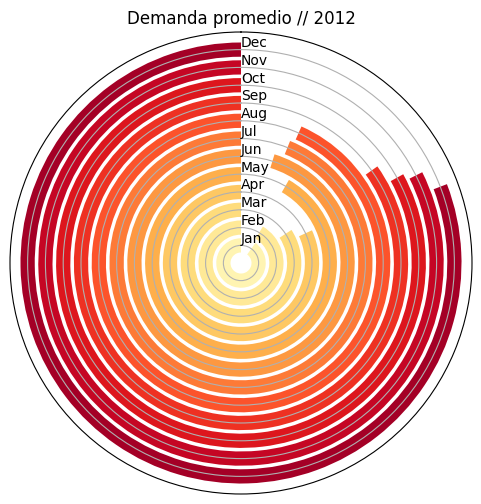

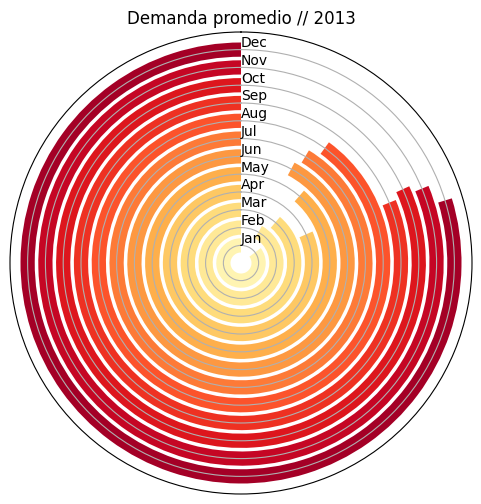

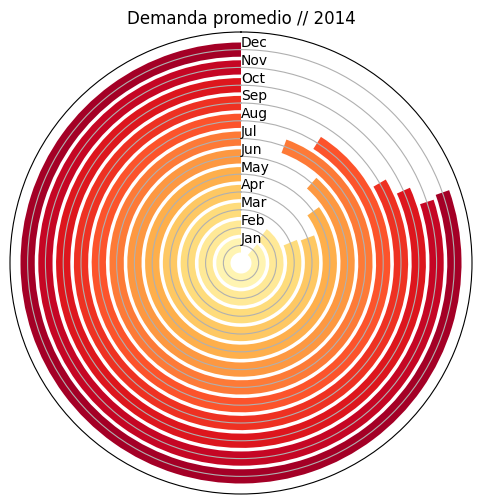

In [ ]:
list_Y = ['2012','2013','2014']
dfs = [df_12,df_13,df_14]
keep_sname_1 = []
order = range(len(list_Y))
for i in order:
    circular_bar(dfs[i],'Demand', list_Y[i])
    keep_sname_1.append('cir_bar_' + str(i) + '.png')
    plt.savefig('cir_bar_' + str(i) + '.png')
    plt.show()

En estos gráficos se destaca el pico en la demanda experimentado en Julio de 2014 respecto al resto de los meses de todos los años.

###- Gráfico de ploteo radial

In [ ]:
pal = list(sns.color_palette(palette='CMRmap_r', n_colors=len(month_order)).as_hex())
lowerLimit = 0
max_v = df_14['Demand'].max()

def radial_plot(input_df, column_name, title):
    input_df.reset_index(inplace=True, drop=True)
    plt.figure(figsize=(6,6))
    ax = plt.subplot(111, polar=True)
    plt.axis()

    heights = input_df[column_name]
    width = 2*np.pi / len(input_df.index)

    indexes = list(range(1, len(input_df.index)+1))
    angles = [element * width for element in indexes]

    bars = ax.bar(x=angles, height=heights, width=width, bottom=lowerLimit,
                  linewidth=1, edgecolor="white", color=pal)

    labelPadding = 2

    for bar, angle, height, label in zip(bars, angles, heights, month_order):
        rotation = np.rad2deg(angle)
        alignment = ""

        if angle >= np.pi/2 and angle < 3*np.pi/2:
            alignment = "right"
            rotation = rotation + 180
        else:
            alignment = "left"

        ax.text(x=angle, y=lowerLimit + bar.get_height() + labelPadding,
                s=label, ha=alignment, va='center', rotation=rotation,
                rotation_mode="anchor")

        ax.set_thetagrids([], labels=[])
        plt.title("Demanda promedio // " + title)
    return ax

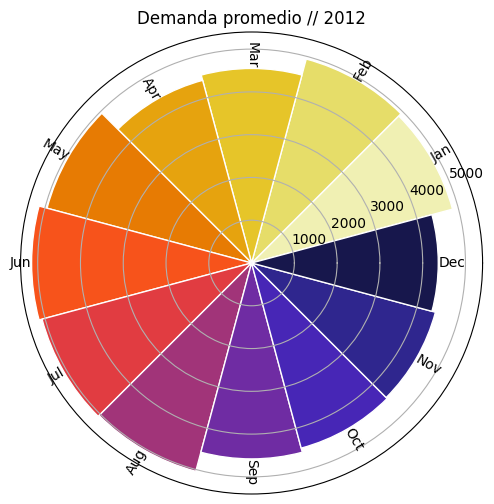

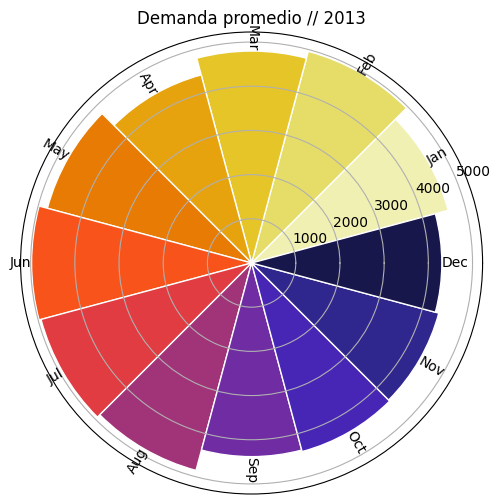

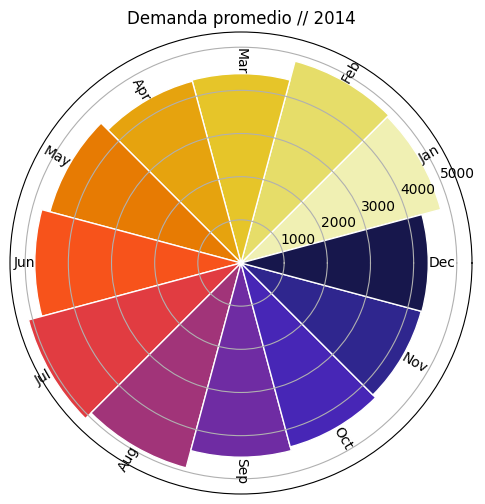

In [ ]:
keep_sname_2 = []
order = range(len(list_Y))

for i in order:
    radial_plot(dfs[i], 'Demand', list_Y[i])
    keep_sname_2.append('rad_bar_' + str(i) + '.png')
    plt.savefig('rad_bar_' + str(i) + '.png')
    plt.show()

### Gráficos unidos

In [ ]:
keep_sname = keep_sname_1 + keep_sname_2
keep_sname

['cir_bar_0.png',
 'cir_bar_1.png',
 'cir_bar_2.png',
 'rad_bar_0.png',
 'rad_bar_1.png',
 'rad_bar_2.png']

In [ ]:
from PIL import Image
def get_collage(cols_n, rows_n, width, height, input_sname, save_name):
    c_width = width//cols_n
    c_height = height//rows_n
    size = c_width, c_height
    new_im = Image.new('RGB', (width, height))
    ims = []
    for p in input_sname:
        im = Image.open(p)
        im.thumbnail(size)
        ims.append(im)
    i, x, y = 0,0,0
    for col in range(cols_n):
        for row in range(rows_n):
            print(i, x, y)
            new_im.paste(ims[i], (x, y))
            i += 1
            y += c_height
        x += c_width
        y = 0
    new_im.save(save_name)

# width = number of columns * figure size // height = number of rows * figure size

get_collage(2, 3, 800, 1200, keep_sname, 'Collage.jpg')

0 0 0
1 0 400
2 0 800
3 400 0
4 400 400
5 400 800


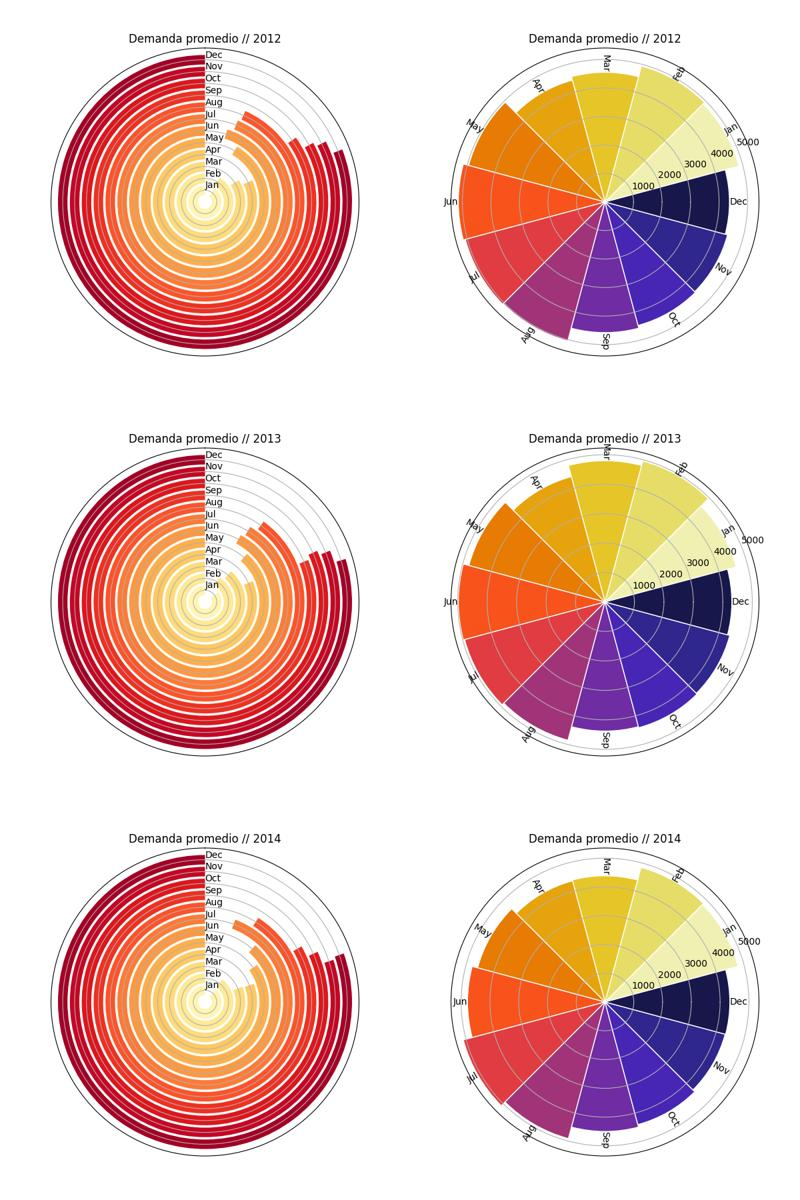

In [ ]:
Image.open('Collage.jpg')

## *Problema 2*

Descomposiciones en tendencia y estacionalidad aditiva y multiplicativa de los gases de madrid 'NO_2' y 'CO'.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd

path = '/content/drive/MyDrive/csvs_per_year'
files = [os.path.join(path, file) for file in os.listdir(path) if file.endswith('.csv')]
df = pd.concat((pd.read_csv(file) for file in files), sort=False)
df = df.groupby(['date']).agg('mean')
df.index = pd.DatetimeIndex(data= df.index)
df.head()

,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PXY,SO_2,TCH,TOL,station,PM25,NO,CH4
date,,,,,,,,,,,,,,,,,,
2001-01-01 01:00:00,3.176667,1.2568,2.560000,4.582,0.239,55.287601,120.004799,2.220,7.8292,30.660417,1.802,22.1004,1.575,10.584444,28079022.44,NaN,NaN,NaN
2001-01-01 02:00:00,7.001111,2.2696,4.711429,5.714,0.383,55.848400,183.621999,2.632,7.0744,41.035909,2.226,24.0064,1.733,19.410000,28079022.44,NaN,NaN,NaN
2001-01-01 03:00:00,9.768889,2.3544,6.628572,10.158,0.401,55.720800,214.429599,4.372,6.8332,56.345218,3.894,25.4832,1.778,29.270000,28079022.44,NaN,NaN,NaN
2001-01-01 04:00:00,9.554444,2.0456,7.222857,14.372,0.365,56.596800,205.904398,6.450,7.1856,47.972083,5.576,23.6180,1.779,30.757778,28079022.44,NaN,NaN,NaN
2001-01-01 05:00:00,7.343333,1.4376,5.522857,11.570,0.260,53.827600,164.040400,5.426,7.9592,36.637083,4.516,20.0304,1.795,24.490000,28079022.44,NaN,NaN,NaN


Primero nos  servimos de la visualización de las 2 series de interés para determinar si existen indicios de estacionalidad. En este problema vamos a trabajar con una frecuencia mensual

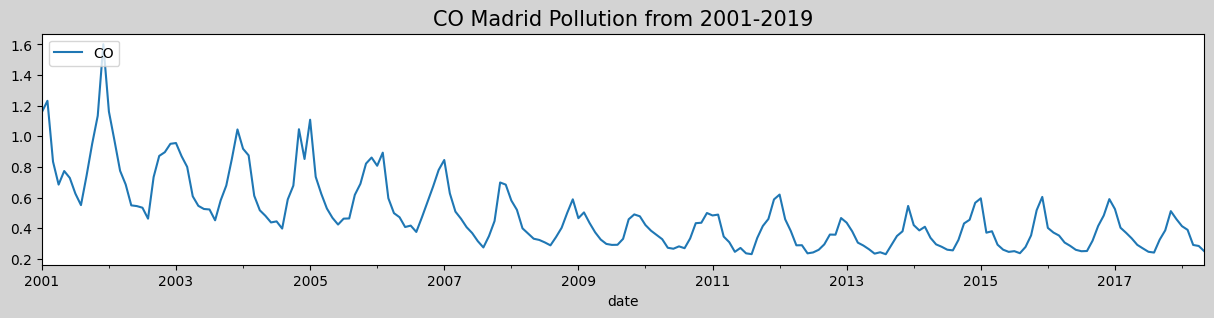

In [ ]:
col_list = ['CO']
monthly_df = df.resample('M').mean()
daily_df = df.resample('D').mean()

plt_monthly = monthly_df[col_list]

fig, ax = plt.subplots(figsize=(15, 3))
fig.set_facecolor('lightgrey')

plt_monthly.plot(ax=ax)
plt.title('CO Madrid Pollution from 2001-2019', fontsize=15)
plt.legend(loc='upper left')
plt.show()

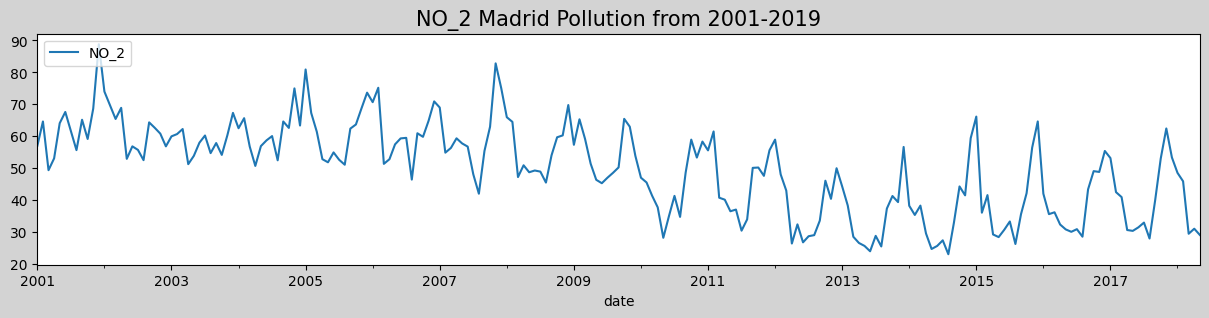

In [ ]:
col_list = ['NO_2']
monthly_df = df.resample('M').mean()
daily_df = df.resample('D').mean()

plt_monthly = monthly_df[col_list]

fig, ax = plt.subplots(figsize=(15, 3))
fig.set_facecolor('lightgrey')

plt_monthly.plot(ax=ax)
plt.title('NO_2 Madrid Pollution from 2001-2019', fontsize=15)
plt.legend(loc='upper left')
plt.show()

En ambos casos la estacionalidad es evidente a simple vista, en especial en el caso del CO.

El modelo aditivo es Y[t] = T[t] + S[t] + e[t]

El modelo multiplicativo es Y[t] = T[t] * S[t] * e[t]

Empezamos analizando **CO**:

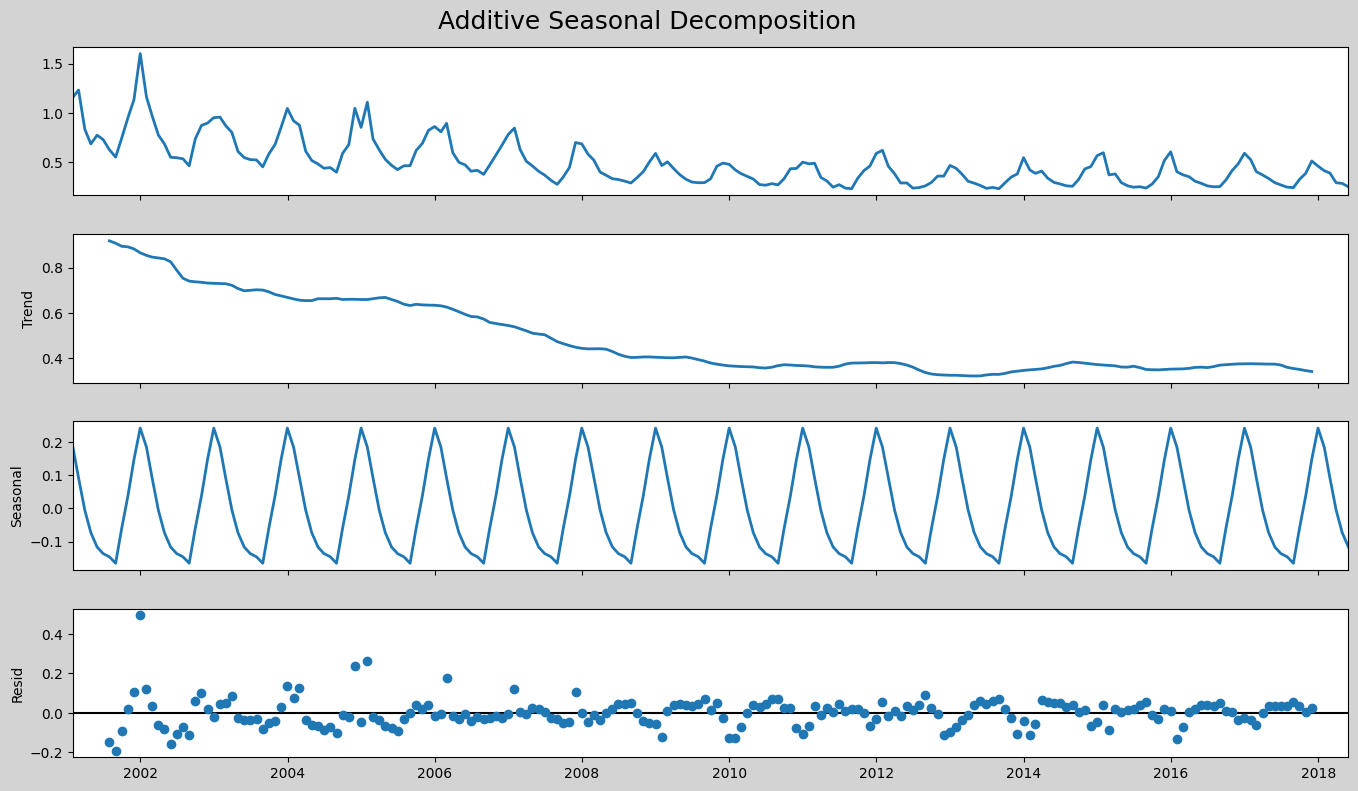

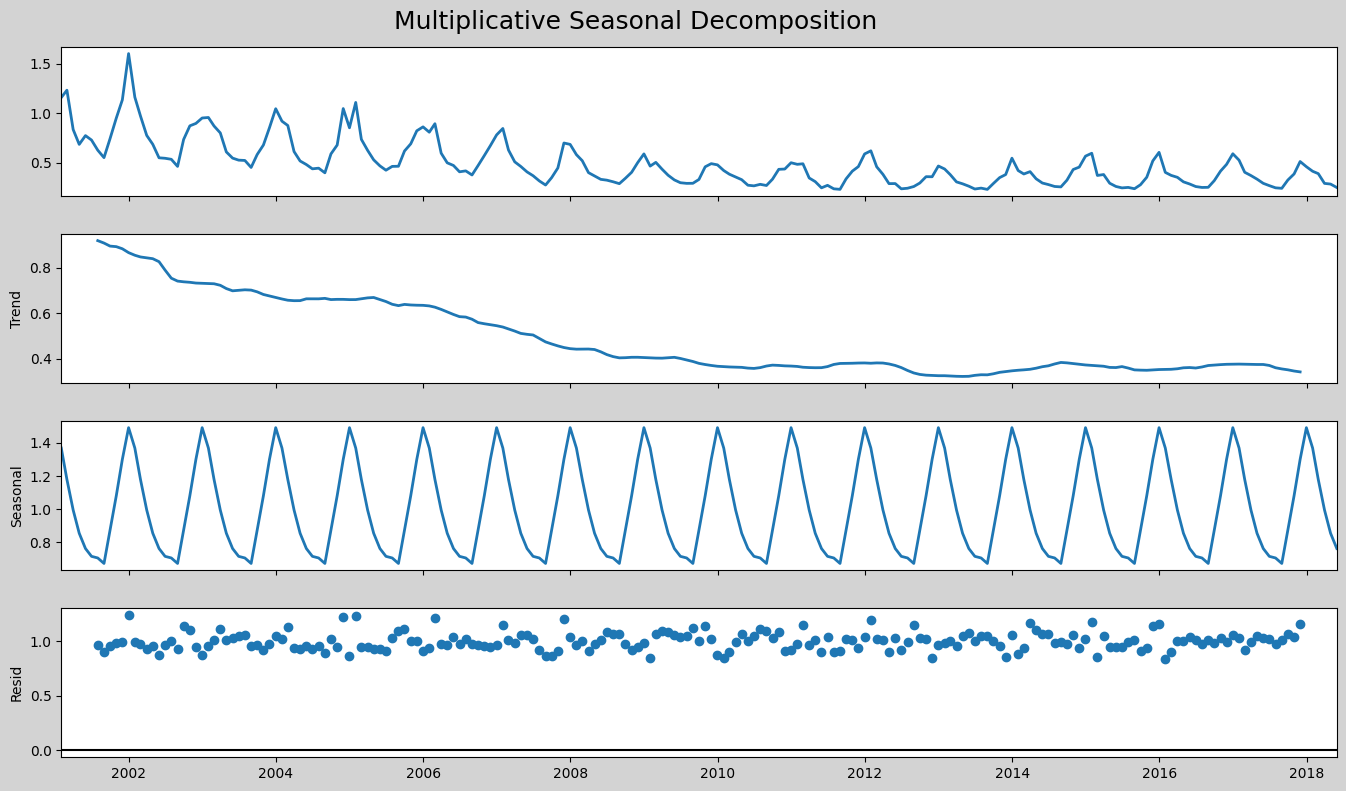

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition_df = pd.DataFrame(monthly_df.CO)
seasonal_a = seasonal_decompose(decomposition_df, model='additive')
seasonal_m = seasonal_decompose(decomposition_df, model='multiplicative')
fig_1 = seasonal_a.plot()
fig_1.set_facecolor('lightgray')
for ax in fig_1.axes:
    ax.lines[0].set_linewidth(2)
fig_2 = seasonal_m.plot()
fig_2.set_facecolor('lightgray')
for ax in fig_2.axes:
    ax.lines[0].set_linewidth(2)

fig_1.suptitle('Additive Seasonal Decomposition', fontsize=18, y=1.015)
fig_1.set_figheight(8)
fig_1.set_figwidth(15)

fig_2.suptitle('Multiplicative Seasonal Decomposition', fontsize=18, y=1.015)
fig_2.set_figheight(8)
fig_2.set_figwidth(15)
plt.show()

Conclusiones: tanto con el método aditivo como con el multiplicatvo la descomposición en tendencia y estacionalidad es muy clara. En el primer caso (tendencia) la misma se comporta como debería con ambos modelos, esto es, con una dirección clara (a la baja) con suavidad, sin estacionalidad. En el segundo caso (componente estacional) se verifican patrones regulares de picos y valles muy marcados, con amplitud constante y ausencia de una tendencia (como corresponde). Además vale resaltar que el componente estacional tiene media 0 (o muy cercana a 0) en el modelo aditivo, pero no así en el multiplicativo

En cuanto a los residuos, estos deberían comportarse de forma aleatoria con media cero y varianza constante. Esto es cierto para el modelo aditivo (aunque la varianza alrededor del año 2002 parece ser mayor a la de los años posteriores), pero no así para el modelo multiplicativo. En particular, los resiudos en el modelo multiplicativo no tienen media cero, lo que podría implicar un sesgo.

En conclusion, el modelo aditivo parece identificar mejor los componentes inherentes a la serie de tiempo correspondiente al CO.

Ahora con **NO_2**:

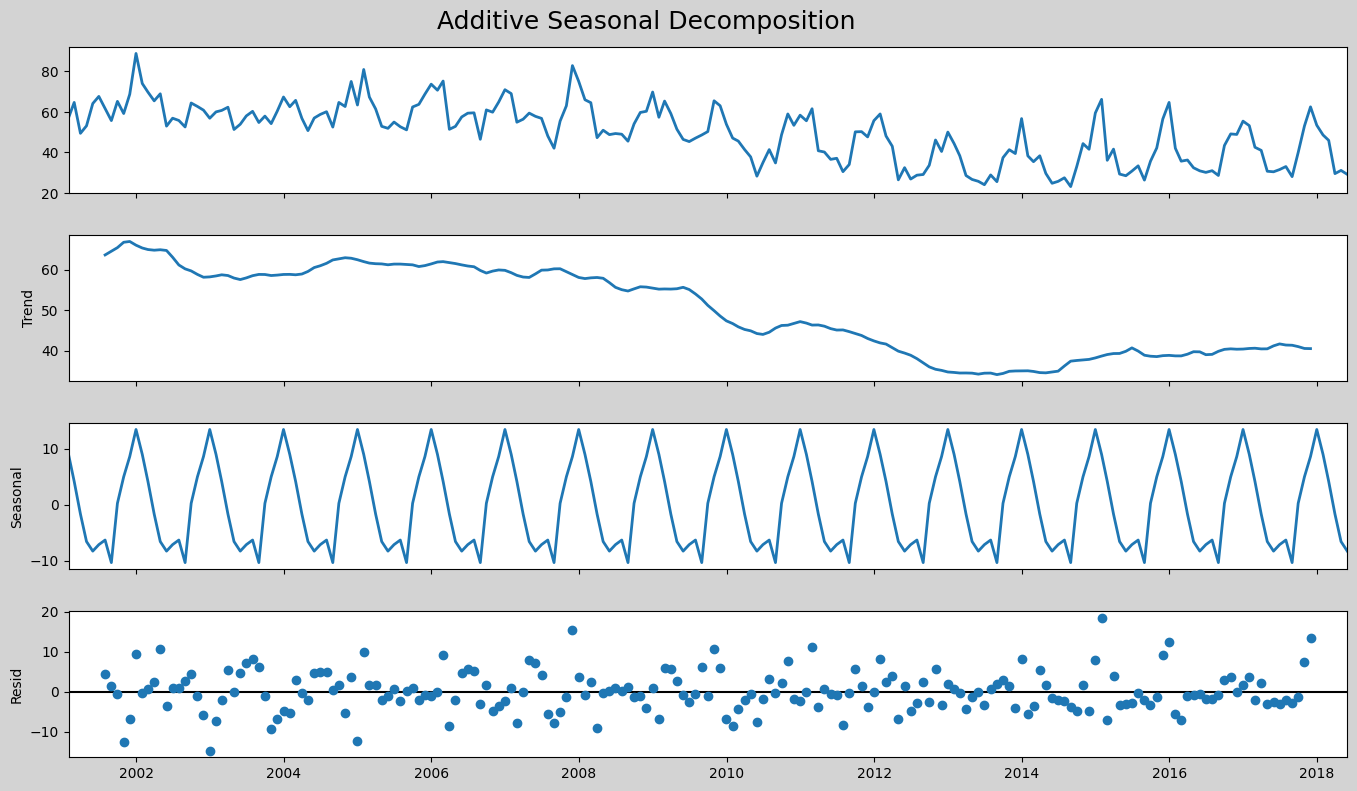

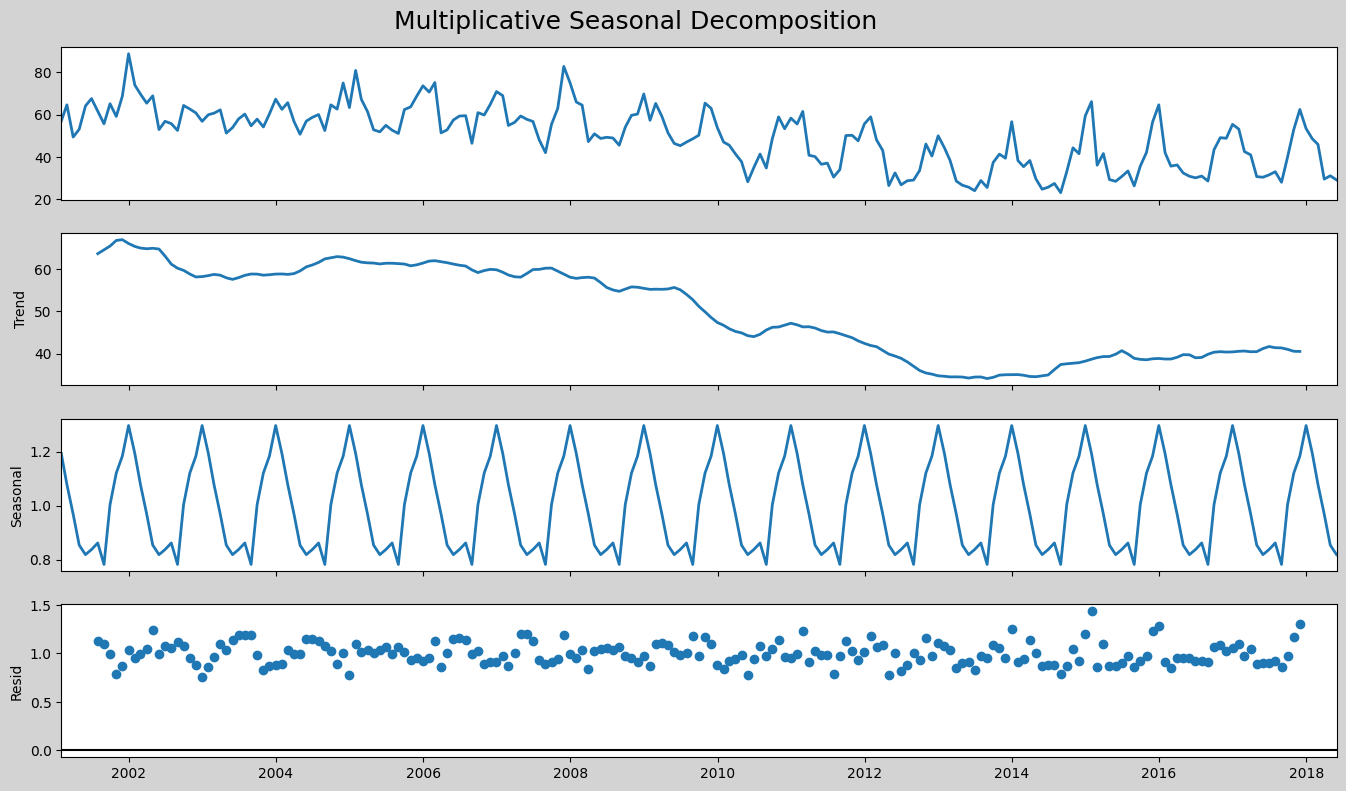

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition_df = pd.DataFrame(monthly_df.NO_2)
seasonal_a = seasonal_decompose(decomposition_df, model='additive')
seasonal_m = seasonal_decompose(decomposition_df, model='multiplicative')
fig_1 = seasonal_a.plot()
fig_1.set_facecolor('lightgray')
for ax in fig_1.axes:
    ax.lines[0].set_linewidth(2)
fig_2 = seasonal_m.plot()
fig_2.set_facecolor('lightgray')
for ax in fig_2.axes:
    ax.lines[0].set_linewidth(2)

fig_1.suptitle('Additive Seasonal Decomposition', fontsize=18, y=1.015)
fig_1.set_figheight(8)
fig_1.set_figwidth(15)

fig_2.suptitle('Multiplicative Seasonal Decomposition', fontsize=18, y=1.015)
fig_2.set_figheight(8)
fig_2.set_figwidth(15)
plt.show()

Conclusiones: los resultados son similares al caso del CO. La tendencia y el componente estacional se comportan correctamente (aunque ahora la tendencia no es tan lineal ni suave como con el CO). La principal divergencia se da con los residuos. Nuevamente la media es 0 en el modelo aditivo pero no así en el multiplicativo, lo que implicaría la presencia de un sesgo en estu último



## *Problema 3*

In [ ]:
url_2 = 'https://raw.githubusercontent.com/jaguirre-econ/Proyectos-Ciencia-de-Datos/main/monthly.csv'
df_monthly = pd.read_csv(url_2)
df_monthly.head()

,date,CO,NO_2
0,2001-01-31,1.157704,57.026588
1,2001-02-28,1.231877,64.654926
2,2001-03-31,0.834881,49.401208
3,2001-04-30,0.685284,53.098803
4,2001-05-31,0.773770,64.109276
